# WeatherPy


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Python-Api-challenge/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | aksarka
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | beringovskiy
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | vestmannaeyjar
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | guadix
Processing Record 15 of Set 1 | mackenzie
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | douglas
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | oistins
Processing Record 22 of Set 

Processing Record 35 of Set 4 | sento se
City not found. Skipping...
Processing Record 36 of Set 4 | horqueta
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | novoagansk
Processing Record 39 of Set 4 | amarante do maranhao
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | springbok
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | vostok
Processing Record 0 of Set 5 | edeia
Processing Record 1 of Set 5 | constantine
Processing Record 2 of Set 5 | moree
Processing Record 3 of Set 5 | suntar
Processing Record 4 of Set 5 | goa velha
Processing Record 5 of Set 5 | kruisfontein
Proc

Processing Record 18 of Set 8 | nadym
Processing Record 19 of Set 8 | itarema
Processing Record 20 of Set 8 | bosaso
Processing Record 21 of Set 8 | provideniya
Processing Record 22 of Set 8 | de aar
Processing Record 23 of Set 8 | madison heights
Processing Record 24 of Set 8 | grand centre
City not found. Skipping...
Processing Record 25 of Set 8 | bathsheba
Processing Record 26 of Set 8 | narsaq
Processing Record 27 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 28 of Set 8 | anloga
Processing Record 29 of Set 8 | boguchany
Processing Record 30 of Set 8 | yuzhou
Processing Record 31 of Set 8 | beloha
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | amravati
Processing Record 35 of Set 8 | scranton
Processing Record 36 of Set 8 | kangaatsiaq
Processing Record 37 of Set 8 | altay
Processing Record 38 of Set 8 | saint-joseph
Processing Record 39 of Set 8 | labrea
City not found. Skipping...
Processing R

Processing Record 1 of Set 12 | taunsa
Processing Record 2 of Set 12 | vryburg
Processing Record 3 of Set 12 | weiser
Processing Record 4 of Set 12 | avera
Processing Record 5 of Set 12 | santa isabel do rio negro
Processing Record 6 of Set 12 | ryotsu
Processing Record 7 of Set 12 | marquette
Processing Record 8 of Set 12 | nizwa
Processing Record 9 of Set 12 | tarudant
City not found. Skipping...
Processing Record 10 of Set 12 | tamandare
Processing Record 11 of Set 12 | sulangan
Processing Record 12 of Set 12 | oskarshamn
Processing Record 13 of Set 12 | juneau
Processing Record 14 of Set 12 | chapadinha
Processing Record 15 of Set 12 | bowen
Processing Record 16 of Set 12 | ballina
Processing Record 17 of Set 12 | tokur
Processing Record 18 of Set 12 | jiaocheng
Processing Record 19 of Set 12 | teguise
Processing Record 20 of Set 12 | kebemer
City not found. Skipping...
Processing Record 21 of Set 12 | mount gambier
Processing Record 22 of Set 12 | luwuk
Processing Record 23 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [13]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,victoria,5.28,115.24,91.00,62,75,6.93,BN,1572758741
1,kodiak,39.95,-94.76,41.00,69,1,3.36,US,1572758682
2,aksarka,66.56,67.80,4.68,89,55,8.79,RU,1572758910
3,butaritari,3.07,172.79,84.45,76,50,16.33,KI,1572758723
4,ketchikan,55.34,-131.65,50.00,93,90,9.17,US,1572758752


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

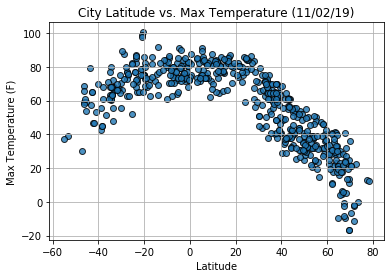

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Python-Api-challenge/output_data/latitudeVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

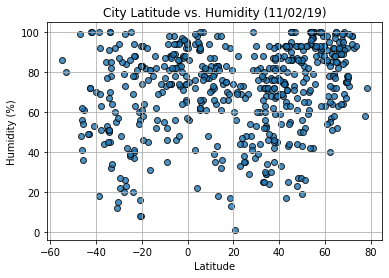

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Python-Api-challenge/output_data/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

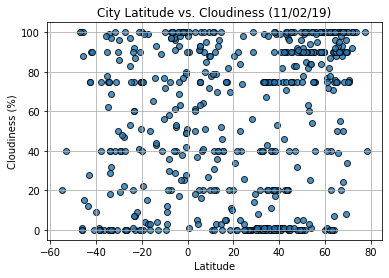

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Python-Api-challenge/output_data/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

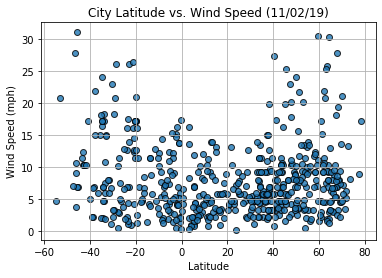

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Python-Api-challenge/output_data/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

# Analysis

As we can see in the data and visualizations the weather gets warmer as you get closer to the equator depicted by city latitude and max temperature plot. Although there doesn't appear to be a relationship between cloudiness and latitude although there are clusters of data. Lastly, I noticed as city latitude is closer to the equator the wind speed is less compared to both hemispheres.